## Importing Libraries

In [92]:
import numpy as np
import pandas as pd # data processing

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Modeling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import catboost as cb
from keras.models import Sequential
from keras.layers import Dense

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [93]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
combine = [train_df, test_df]

In [94]:
print(train_df.columns.values)

['case_id' 'Hospital_code' 'Hospital_type_code' 'City_Code_Hospital'
 'Hospital_region_code' 'Available Extra Rooms in Hospital' 'Department'
 'Ward_Type' 'Ward_Facility_Code' 'Bed Grade' 'patientid'
 'City_Code_Patient' 'Type of Admission' 'Severity of Illness'
 'Visitors with Patient' 'Age' 'Admission_Deposit' 'Stay']


##### Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? This also helps us select the appropriate plots for visualization.

Categorical: Hospital_code, Hospital_type_code, City_Code_Hospital, Hospital_region_code, Department, Ward_Type, Type of Admission, Severity of Illness

##### Which features are numerical?

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this also helps us select the appropriate plots for visualization.

Continous: case_id, Available Extra Rooms in Hospital, patientid, Visitors with Patient, Age, Admission_Deposit

In [95]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [96]:
train_df.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


##### Which features contain blank, null or empty values?

These will require correcting.

    1. Bed Grade and City_Code_Patient are features that contain a number of null values.
    2. Bed Grade and City_Code_Patient are incomplete in case of test dataset as well.

##### What are the data types for various features?

    1. Eleven features are integer or floats. Ten in case of test dataset.
    2. Seven features are strings (object).

In [97]:
print(train_df.isnull().sum())
print('-'*40)
print(test_df.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64
----------------------------------------
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code  

##### What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

    1. Total Samples are 318348 in training data.
    2. Case_id is a unique id provided to each sample.
    3. Hospital_code, City_Code_Hospital and Bed Grade are categorical features.
    4. There are multiple data samples of same patient.
    5. Admission_Deposit varies from 1000 to 11000 considering different samples/cases.

In [98]:
train_df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


##### What is the distribution of categorical features?

    1. A total of 7 hospital types in 3 different regions are present.
    2. 'TB & Chest disease' and 'surgery' combined consists of <1% of total samples in Department. Most of them are from 'gynecology'.
    3. Type of Admission are categorised in Trauma, Emergency and Urgent categories.
    4. Most patients are form 21-60 age group and <1% are 91-100.
    5. Stay is our prediction column in train dataset i.e. we need to predict this in test data.

In [99]:
train_df.describe(include='O')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


#### Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

##### Correlating
We want to know how well does each feature correlate with Stay as it is our prediction column.

##### Completing
    1. We want to complete/fill empty values in Bed Grade column as it will surely be a factor to decide 'Stay' period.
    2. We may want to complete City_Code_Patient it may correlate to 'Stay' or other columns.
    
##### Correcting
    1. 'case_id', 'patientid' and 'Visitors with Patient' will be dropped as it is not correlated to 'Stay' in any sense.
    
##### Creating
    1. We may need to change some features if it helps.
    2. We may want to create a 'Admission_Deposit' range feature if it helps in analysis.

## Data Wrangle

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not change any feature or value to arrive at these. Now we will execute our decisions and assumptions for correcting, creating and completing goals.

Note : We need to perform these operations on training and testing data both to stay consistent and dont get confused later.

##### Correcting by dropping Features
As we have decided earlier we want to drop 'patientid' and 'Visitors with Patient' Features.

In [100]:
print('Earlier - ', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['case_id', 'patientid', 'Visitors with Patient'], axis=1)
test_df = test_df.drop(['patientid', 'Visitors with Patient'], axis=1)
combine = [train_df, test_df]

print('After Dropping - ', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Earlier -  (318438, 18) (137057, 17) (318438, 18) (137057, 17)
After Dropping -  (318438, 15) (137057, 15) (318438, 15) (137057, 15)


##### Taking Care of NaN values in Features

##### Bed Grade and City_Code_Patient are two columns we need to take care.

    1. Here Bed Grade is an important feature correlated to Stay so I will be filling NaN with most occuring Bed Grade type.
    2. In City_Code_Patient also I am filling NaN with most occuring category type.
    3. Changing their data type to integer.

In [101]:
freq = train_df['Bed Grade'].value_counts().index[0] # Most frequent Bed Grade category.
print(freq)
train_df['Bed Grade'].fillna(freq, inplace=True)
test_df['Bed Grade'].fillna(freq, inplace=True)

freq_2 = train_df['City_Code_Patient'].value_counts().index[0] # Most frequent City_Code_Patient category.
print(freq_2)
train_df['City_Code_Patient'].fillna(freq_2, inplace=True)
test_df['City_Code_Patient'].fillna(freq_2, inplace=True)

# Changing Data Types
for df in combine:
    df['Bed Grade'] = df['Bed Grade'].astype(int)
    df['City_Code_Patient'] = df['City_Code_Patient'].astype(int)

2.0
8.0


##### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

In [102]:
df = train_df.copy()

In [103]:
encoder = LabelEncoder()

# Encoding all columns except Stay
Columns_To_Encode = train_df.describe(include='O').columns.array[:-1]

for col in Columns_To_Encode:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [104]:
# Encoding Stay Feature
le = LabelEncoder()
train_df['Stay'] = le.fit_transform(train_df['Stay'])

##### Splitting Training Data

    1. Splitting train_df into x_train, x_test, y_train, y_test using 'train_test_split()'
    2. Training Model on this data.

In [105]:
Data = np.array(train_df.loc[:, train_df.columns!='Stay'].values).astype(int)
Target = np.array(train_df['Stay'].values).astype(int)
x_train, x_val, y_train, y_val = train_test_split(Data, Target, random_state=0, test_size=0.2)

In [106]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((254750, 14), (63688, 14), (254750,), (63688,))

In [107]:
# Data on which we have to predict.
test_data = np.array(test_df.loc[:, test_df.columns!='case_id'].values).astype(int)
test_data

array([[  21,    2,    3, ...,    2,    7, 3095],
       [  29,    0,    4, ...,    2,    7, 4018],
       [  26,    1,    2, ...,    2,    7, 4492],
       ...,
       [  30,    2,    3, ...,    1,    0, 7190],
       [   5,    0,    1, ...,    1,    4, 5435],
       [   6,    0,    6, ...,    0,    5, 4702]])

## Model  and Predict

##### 1. Logistic Regression

In [115]:
lr = LogisticRegression(solver='saga', max_iter=400)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)
acc_lr = round(lr.score(x_train, y_train)*100, 2)
acc_lr_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_lr, acc_lr_val

(29.21, 29.17)

<AxesSubplot:>

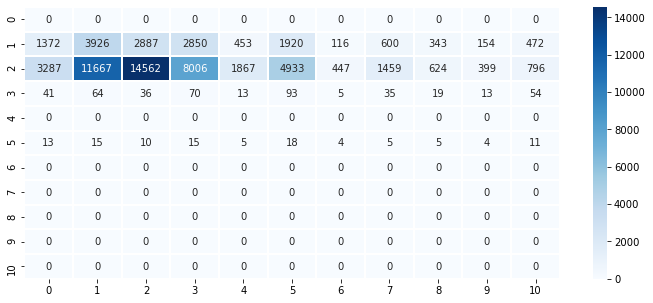

In [116]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [117]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4713
           1       0.26      0.25      0.26     15672
           2       0.30      0.83      0.44     17495
           3       0.16      0.01      0.01     10941
           4       0.00      0.00      0.00      2338
           5       0.17      0.00      0.01      6964
           6       0.00      0.00      0.00       572
           7       0.00      0.00      0.00      2099
           8       0.00      0.00      0.00       991
           9       0.00      0.00      0.00       570
          10       0.00      0.00      0.00      1333

    accuracy                           0.29     63688
   macro avg       0.08      0.10      0.07     63688
weighted avg       0.19      0.29      0.19     63688



##### 2. KNeighbours Classifier

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_knn, acc_knn_val

(53.08, 24.18)

<AxesSubplot:>

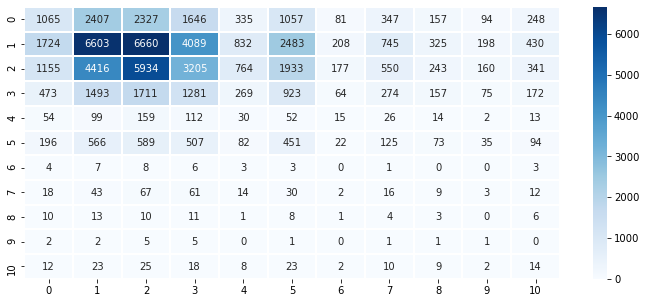

In [119]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [120]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.23      0.15      4713
           1       0.27      0.42      0.33     15672
           2       0.31      0.34      0.33     17495
           3       0.19      0.12      0.14     10941
           4       0.05      0.01      0.02      2338
           5       0.16      0.06      0.09      6964
           6       0.00      0.00      0.00       572
           7       0.06      0.01      0.01      2099
           8       0.04      0.00      0.01       991
           9       0.06      0.00      0.00       570
          10       0.10      0.01      0.02      1333

    accuracy                           0.24     63688
   macro avg       0.12      0.11      0.10     63688
weighted avg       0.22      0.24      0.22     63688



##### 3. Gaussian NaiveBayes

In [122]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_gaussian, acc_gaussian_val

(30.27, 30.09)

<AxesSubplot:>

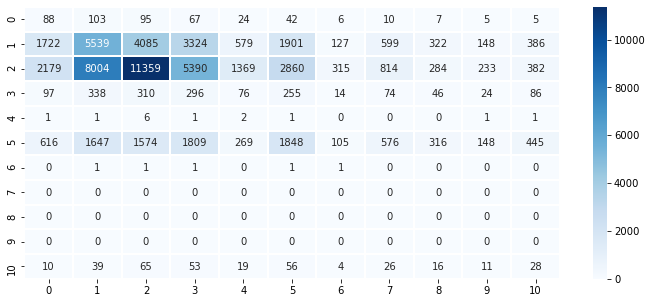

In [123]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [124]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.02      0.03      4713
           1       0.30      0.35      0.32     15672
           2       0.34      0.65      0.45     17495
           3       0.18      0.03      0.05     10941
           4       0.14      0.00      0.00      2338
           5       0.20      0.27      0.23      6964
           6       0.20      0.00      0.00       572
           7       0.00      0.00      0.00      2099
           8       0.00      0.00      0.00       991
           9       0.00      0.00      0.00       570
          10       0.09      0.02      0.03      1333

    accuracy                           0.30     63688
   macro avg       0.15      0.12      0.10     63688
weighted avg       0.24      0.30      0.24     63688



##### 4. Decision Tree Classifier

In [125]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_decision_tree, acc_decision_tree_val

(99.91, 23.26)

<AxesSubplot:>

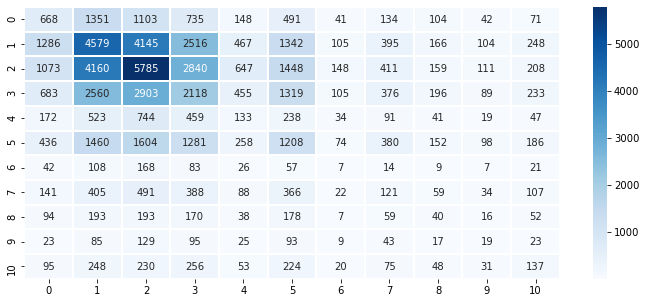

In [126]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [127]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14      4713
           1       0.30      0.29      0.30     15672
           2       0.34      0.33      0.34     17495
           3       0.19      0.19      0.19     10941
           4       0.05      0.06      0.05      2338
           5       0.17      0.17      0.17      6964
           6       0.01      0.01      0.01       572
           7       0.05      0.06      0.06      2099
           8       0.04      0.04      0.04       991
           9       0.03      0.03      0.03       570
          10       0.10      0.10      0.10      1333

    accuracy                           0.23     63688
   macro avg       0.13      0.13      0.13     63688
weighted avg       0.24      0.23      0.23     63688



##### 5. Random Forest

In [128]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_val)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_random_forest, acc_random_forest_val

(99.91, 29.31)

<AxesSubplot:>

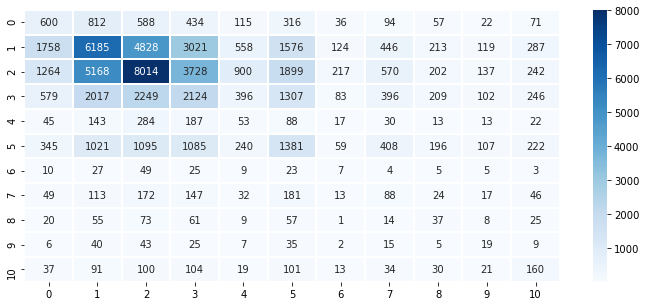

In [129]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [130]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.13      0.15      4713
           1       0.32      0.39      0.36     15672
           2       0.36      0.46      0.40     17495
           3       0.22      0.19      0.21     10941
           4       0.06      0.02      0.03      2338
           5       0.22      0.20      0.21      6964
           6       0.04      0.01      0.02       572
           7       0.10      0.04      0.06      2099
           8       0.10      0.04      0.05       991
           9       0.09      0.03      0.05       570
          10       0.23      0.12      0.16      1333

    accuracy                           0.29     63688
   macro avg       0.18      0.15      0.15     63688
weighted avg       0.27      0.29      0.28     63688



##### 6. XGBoost Classifier

In [131]:
xgb_model = xgb.XGBClassifier(n_estimators=1000, max_depth=7)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_val)
acc_xgb = round(xgb_model.score(x_train, y_train) * 100, 2)
acc_xgb_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_xgb, acc_xgb_val

[12:06:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(69.19, 33.08)

<AxesSubplot:>

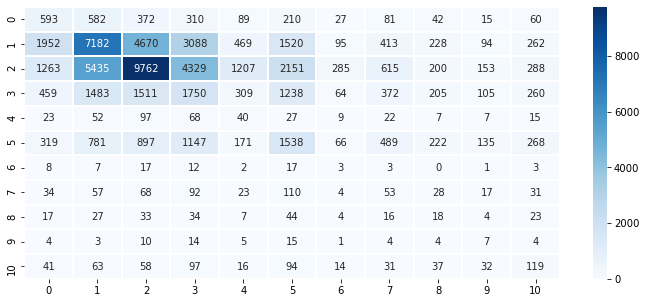

In [132]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [133]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.13      0.17      4713
           1       0.36      0.46      0.40     15672
           2       0.38      0.56      0.45     17495
           3       0.23      0.16      0.19     10941
           4       0.11      0.02      0.03      2338
           5       0.25      0.22      0.24      6964
           6       0.04      0.01      0.01       572
           7       0.10      0.03      0.04      2099
           8       0.08      0.02      0.03       991
           9       0.10      0.01      0.02       570
          10       0.20      0.09      0.12      1333

    accuracy                           0.33     63688
   macro avg       0.19      0.15      0.15     63688
weighted avg       0.29      0.33      0.30     63688



##### 7. CatBoost Classifier

In [134]:
cb_model = cb.CatBoostClassifier(max_depth=7)
cb_model.fit(x_train, y_train)
y_pred = cb_model.predict(x_val)
acc_cb = round(cb_model.score(x_train, y_train) * 100, 2)
acc_cb_val = round(f1_score(y_val, y_pred, average='micro')*100, 2)
acc_cb, acc_cb_val

Learning rate set to 0.104963
0:	learn: 2.2691449	total: 249ms	remaining: 4m 9s
1:	learn: 2.1797754	total: 518ms	remaining: 4m 18s
2:	learn: 2.1112543	total: 788ms	remaining: 4m 21s
3:	learn: 2.0580409	total: 1.07s	remaining: 4m 27s
4:	learn: 2.0144306	total: 1.36s	remaining: 4m 31s
5:	learn: 1.9796802	total: 1.66s	remaining: 4m 34s
6:	learn: 1.9502685	total: 1.94s	remaining: 4m 35s
7:	learn: 1.9278835	total: 2.13s	remaining: 4m 24s
8:	learn: 1.9069846	total: 2.47s	remaining: 4m 32s
9:	learn: 1.8889131	total: 2.81s	remaining: 4m 38s
10:	learn: 1.8737149	total: 3.14s	remaining: 4m 42s
11:	learn: 1.8611718	total: 3.46s	remaining: 4m 45s
12:	learn: 1.8497208	total: 3.79s	remaining: 4m 47s
13:	learn: 1.8399910	total: 4.12s	remaining: 4m 49s
14:	learn: 1.8315205	total: 4.45s	remaining: 4m 52s
15:	learn: 1.8237811	total: 4.75s	remaining: 4m 52s
16:	learn: 1.8169565	total: 5.03s	remaining: 4m 50s
17:	learn: 1.8112243	total: 5.31s	remaining: 4m 49s
18:	learn: 1.8058617	total: 5.6s	remaining: 4

(41.11, 34.92)

<AxesSubplot:>

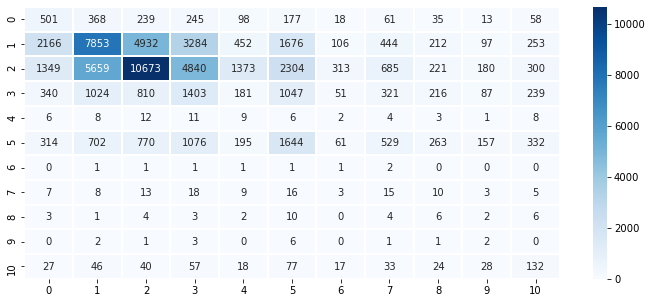

In [135]:
cm = confusion_matrix(y_pred, y_val)
cm = pd.DataFrame(cm , index = [i for i in range(11)] , columns = [i for i in range(11)])
plt.figure(figsize = (12, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [136]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.11      0.15      4713
           1       0.37      0.50      0.42     15672
           2       0.38      0.61      0.47     17495
           3       0.25      0.13      0.17     10941
           4       0.13      0.00      0.01      2338
           5       0.27      0.24      0.25      6964
           6       0.12      0.00      0.00       572
           7       0.14      0.01      0.01      2099
           8       0.15      0.01      0.01       991
           9       0.12      0.00      0.01       570
          10       0.26      0.10      0.14      1333

    accuracy                           0.35     63688
   macro avg       0.22      0.15      0.15     63688
weighted avg       0.31      0.35      0.31     63688



##### 8. Neural Network Model

In [59]:
# creating a model.
model = Sequential()

# adding layers
model.add(Dense(units = 256, activation = 'relu', input_dim = 14)) # for first layer input_dim(14) are necessary.
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 11, activation = 'softmax'))

# compile, fit and validate
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
3981/3981 [==============================] - 7s 2ms/step - loss: 3.4980 - accuracy: 0.2461 - val_loss: 1.9004 - val_accuracy: 0.2749
Epoch 2/10
3981/3981 [==============================] - 7s 2ms/step - loss: 1.9079 - accuracy: 0.2683 - val_loss: 1.8975 - val_accuracy: 0.2494
Epoch 3/10
3981/3981 [==============================] - 8s 2ms/step - loss: 1.8944 - accuracy: 0.2707 - val_loss: 1.8875 - val_accuracy: 0.2755
Epoch 4/10
3981/3981 [==============================] - 8s 2ms/step - loss: 1.8852 - accuracy: 0.2745 - val_loss: 1.8993 - val_accuracy: 0.2768
Epoch 5/10
3981/3981 [==============================] - 8s 2ms/step - loss: 1.8737 - accuracy: 0.2801 - val_loss: 1.8676 - val_accuracy: 0.2849
Epoch 6/10
3981/3981 [==============================] - 8s 2ms/step - loss: 1.8656 - accuracy: 0.2846 - val_loss: 1.8650 - val_accuracy: 0.2851
Epoch 7/10
3981/3981 [==============================] - 8s 2ms/step - loss: 1.8604 - accuracy: 0.2864 - val_loss: 1.8609 - val_accuracy:

In [73]:
acc_model = model.evaluate(x_val,y_val)[1]*100
acc_model

1991/1991 [==============================] - 1s 634us/step - loss: 1.8600 - accuracy: 0.2854


28.535988926887512

In [139]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'GaussianNB',
              'Decision Tree', 'Random Forest', 'XGBoost',
              'CatBoost', 'Neural Network'],
    'Training Accuracy': [acc_lr, acc_knn, acc_gaussian, 
              acc_decision_tree, acc_random_forest, acc_xgb,
              acc_cb, '-'], 
    'Validation Accuracy': [acc_lr_val, acc_knn_val, acc_gaussian_val, 
              acc_decision_tree_val, acc_random_forest_val, acc_xgb_val,
              acc_cb_val, acc_model]})
models.sort_values(by='Validation Accuracy', ascending=False)

,Model,Training Accuracy,Validation Accuracy
6,CatBoost,41.11,34.920000
5,XGBoost,69.19,33.080000
2,GaussianNB,30.27,30.090000
4,Random Forest,99.91,29.310000
0,Logistic Regression,29.21,29.170000
7,Neural Network,-,28.535989
1,KNN,53.08,24.180000
3,Decision Tree,99.91,23.260000


As we can see CatBoost model is performing the best with validation data, so I will be using this to predict for test data as well.

In [154]:
# Prediction on test data
test_pred = cb_model.predict(test_data)

# Creating Dataframe from prediction
submission = pd.DataFrame({
    'case_id': test_df.case_id,
    'Stay': le.inverse_transform(test_pred.reshape(-1))
})

submission.head(10)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
5,318444,21-30
6,318445,21-30
7,318446,11-20
8,318447,21-30
9,318448,21-30


## Saving Predictions

In [158]:
submission.to_csv('predictions.csv', index=False)